In [1]:
!ls -lah data_phase1; cat data_phase1/TermsAndConditions.txt

total 1.6G
drwxrwxr-x 2 heitor heitor 4.0K Jun 11 00:46 .
drwxrwxr-x 6 heitor heitor 4.0K Jun 14 13:48 ..
-rw-rw-r-- 1 heitor heitor  44M Mar 31 18:07 attributes.parquet
-rw-rw-r-- 1 heitor heitor  87M Mar 31 19:24 submission_example.csv
-rw-rw-r-- 1 heitor heitor  87M Jun 11 00:47 submission_popular.csv
-rw-rw-r-- 1 heitor heitor 1.3K Mar 31 18:19 TermsAndConditions.txt
-rw-rw-r-- 1 heitor heitor 1.2G Mar 31 19:56 train.parquet
-rw-rw-r-- 1 heitor heitor 222M Mar 31 19:58 validation.parquet
By accepting these Rules and therefore entering the Farfetch Challenge, you may access and use the Data solely and exclusively for the purposes of participating in the Farfetch Challenge. In no event whatsoever, will you be able to use the Data for any commercial purposes.
You also hereby agree that your participation in the Farfetch Challenge shall not be construed as having or being granted a license (expressly, by implication, estoppel, or otherwise) under, or any right of ownership in, any of t

In [2]:
!pip3 install matplotlib

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip3 install SciencePlots

In [4]:
!pip3 install surprise

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Defaulting to user installation because normal site-packages is not writeable


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import time
import surprise
plt.style.reload_library()
plt.style.use(['science','notebook'])
plt.rcParams['figure.figsize'] = [12/2.5, 8/2.5]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

In [23]:
base_dir = 'data_phase1/'
attributes_df = pd.read_parquet(base_dir+'attributes.parquet')
train_df = pd.read_parquet(base_dir+'train.parquet')
validation_df = pd.read_parquet(base_dir+'validation.parquet')

In [4]:
train_df.columns

Index(['query_id', 'user_id', 'session_id', 'product_id', 'page_type',
       'previous_page_type', 'device_category', 'device_platform', 'user_tier',
       'user_country', 'context_type', 'context_value', 'product_price',
       'week', 'week_day', 'is_click'],
      dtype='object')

In [9]:
validation_df.columns

Index(['query_id', 'user_id', 'session_id', 'product_id', 'page_type',
       'previous_page_type', 'device_category', 'device_platform', 'user_tier',
       'user_country', 'context_type', 'context_value', 'product_price',
       'week', 'week_day'],
      dtype='object')

In [10]:
attributes_df.columns

Index(['product_id', 'gender', 'main_colour', 'second_colour', 'season',
       'collection', 'category_id_l1', 'category_id_l2', 'category_id_l3',
       'brand_id', 'season_year', 'start_online_date', 'material_values',
       'attribute_values'],
      dtype='object')

In [11]:
train_df.isna().sum()

query_id                   0
user_id                    0
session_id                 0
product_id                 0
page_type                  0
previous_page_type         0
device_category            0
device_platform            0
user_tier                  0
user_country               0
context_type          152514
context_value              0
product_price              0
week                       0
week_day                   0
is_click                   0
dtype: int64

In [175]:
attributes_df.isna().sum()

product_id           0
gender               0
main_colour          0
second_colour        0
season               0
collection           0
category_id_l1       0
category_id_l2       0
category_id_l3       0
brand_id             0
season_year          0
start_online_date    0
material_values      0
attribute_values     0
dtype: int64

In [174]:
validation_df.isna().sum()

query_id                  0
user_id                   0
session_id                0
product_id                0
page_type                 0
previous_page_type        0
device_category           0
device_platform           0
user_tier                 0
user_country              0
context_type          15342
context_value             0
product_price             0
week                      0
week_day                  0
dtype: int64

In [7]:
attributes_df

,product_id,gender,main_colour,second_colour,season,collection,category_id_l1,category_id_l2,category_id_l3,brand_id,season_year,start_online_date,material_values,attribute_values
0,0013f07ccdf212210c110e63f0de46e37669c17a4d855a...,a8c9cca4c116691f1e331a5058e84f05e31696bc4f611c...,7673fc4fdc325f3785a223787d2b32e381e8b4c1c8a765...,4737cd35940c2338e96c18a25aeb6848d46f0da795bce8...,847a067597e39838f1f85b0774f44e68b4d6e64d3ec4dd...,a3791e8d85c005b0d9d60d6d3b7e8edd2f256a5cc928d0...,abf367e49718254e068eee51a565fdcede2d741e4c7e33...,61fe255948ec07c4eb25c70f7144b54beddd00466ad866...,05f872d8b8ec85642ad49786d6e443c0df6e7df4bdcba3...,dd6ea8954a945ef0889f30d57b7fdb8d6aaad397e6c6ff...,c7c4ac6af030e54d02b9e4545e4223e76515c3ce4e498e...,1067.041667,f61ecea9b45f1590e57706b88207449bdd4cb703b917ad...,8b45c5d5e010acf257787f2ce0c505857d94709c436991...
1,002239cd57f19f22e557030dff363dfbd1344d8f7ac829...,4a00d8b84bdb2ec2f219304d3883a46336f9fb38d2f1e6...,0f97dafafa5dc4bb18853ea00776dfcc52302f40411b50...,ca8c396e7422e324d4454a911e0319d07b85a4fb89b006...,9db35d237f5873f0410d3ca18c07430270086eb1e7838d...,a3791e8d85c005b0d9d60d6d3b7e8edd2f256a5cc928d0...,e54f8513b708db3afdbd4950bd3420579a8cddabf4c1b3...,3809cade495cd7dc289e6aee521d380549ebd3456f03bc...,fd021cd2dbaf0d7b6105a1b136cf5a094e025010a2096f...,a6536c6bc250d525ccd3b63a3ec483a33a2010422932a3...,ef7d8d2e02aec8c328dafde95486f7181c37d07be3d167...,215.041667,1675f293342bbb518ba3a5ad39399aa0a13580653d253e...,ca8c396e7422e324d4454a911e0319d07b85a4fb89b006...
2,0028022e1ecbbf92f03a1edb9accb58e7c682e7cd89897...,a8c9cca4c116691f1e331a5058e84f05e31696bc4f611c...,0f97dafafa5dc4bb18853ea00776dfcc52302f40411b50...,ca8c396e7422e324d4454a911e0319d07b85a4fb89b006...,9db35d237f5873f0410d3ca18c07430270086eb1e7838d...,4c8006c7e513057a9138641abc2a9e65f4b014a8045259...,bb660069187af9e9238d10a742def09bf2bed60435b088...,8d4b33036479822fc696f32e1252b16e5105b91b82d564...,ca8c396e7422e324d4454a911e0319d07b85a4fb89b006...,c9c2f76b2ae7911c95e1b9568a614c14bd0eebc750cade...,dc1194ba428d5cd4c49f8a769a6577ac1042162da38bc1...,519.000000,5254281b3c0b606d2c56ae1747cf0b0a868053cc3246d2...,ca8c396e7422e324d4454a911e0319d07b85a4fb89b006...
3,00433de93d9cb6b08584423a6b54306abacef89fbddffe...,a8c9cca4c116691f1e331a5058e84f05e31696bc4f611c...,9a446cf5272a0694254db28c796c058405fc9caeb6352f...,ca8c396e7422e324d4454a911e0319d07b85a4fb89b006...,9db35d237f5873f0410d3ca18c07430270086eb1e7838d...,a3791e8d85c005b0d9d60d6d3b7e8edd2f256a5cc928d0...,abf367e49718254e068eee51a565fdcede2d741e4c7e33...,c71ada9c30cd0210a4bdd2d54172dc7be4f07c9ffdbaa3...,f9226009034d0eecc774be42fbe07e9cdcf9ca5dd24fb5...,2f85e4e89f3d731a3fcc43c1ea068600dc082d9b2656de...,ef7d8d2e02aec8c328dafde95486f7181c37d07be3d167...,202.041667,2a9ca66cf16c629b4d0fb6d78e988a199db1490ef21d78...,ca8c396e7422e324d4454a911e0319d07b85a4fb89b006...
4,009623ea17e53324f8f5a3f45f5b21b9a885ea2765de82...,a8c9cca4c116691f1e331a5058e84f05e31696bc4f611c...,68b6499cff2b4a31b0927effd65c194c69c24954fcb80b...,ca8c396e7422e324d4454a911e0319d07b85a4fb89b006...,9db35d237f5873f0410d3ca18c07430270086eb1e7838d...,b5beb2ed60981746e0b908797b3d3abb8491de15ff5575...,abf367e49718254e068eee51a565fdcede2d741e4c7e33...,c71ada9c30cd0210a4bdd2d54172dc7be4f07c9ffdbaa3...,162f8b725de80863b3ced87304a2922fe3d1bd1f25562f...,668b3eeef29561fa9dd4da956ca3eb2787b2d8df515eed...,ef7d8d2e02aec8c328dafde95486f7181c37d07be3d167...,211.041667,d276da9d2047f312bb486b3b59a646f046d72bc3cf2e19...,ca8c396e7422e324d4454a911e0319d07b85a4fb89b006...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443145,b9cbd442079ef93bf71c4b57841f130827c56c25ab81ae...,a8c9cca4c116691f1e331a5058e84f05e31696bc4f611c...,f67dfa4e29116c5e9f22409d833124c101ec33c7bcfee2...,ca8c396e7422e324d4454a911e0319d07b85a4fb89b006...,847a067597e39838f1f85b0774f44e68b4d6e64d3ec4dd...,a3791e8d85c005b0d9d60d6d3b7e8edd2f256a5cc928d0...,bb660069187af9e9238d10a742def09bf2bed60435b088...,663ca810e6cd391f1a8c24b0e39c4ac59f7e04c4759356...,ca8c396e7422e324d4454a911e0319d07b85a

In [8]:
train_df


,query_id,user_id,session_id,product_id,page_type,previous_page_type,device_category,device_platform,user_tier,user_country,context_type,context_value,product_price,week,week_day,is_click
0,92d4dd491a874a2cf92c8d311a44a42b597c64a5ede23d...,e5e4c71b1b9456dafece1338762d4ee3db698cf32c384c...,2740b0d77b4e6fafd75321f7d0794210afa8bd650955e7...,bf056e3841dd3a358c6aacb1f9e74e4c7c4adc62e33b45...,596618814963e496d74434df8b8fe3306892f2e4ce6aaa...,c9f34437ce0e536fefd11a34b9a411b541d2dabfec872a...,d6538f13ace825448d0af4fa5e58d2d08fa2d0850e5e14...,d6538f13ace825448d0af4fa5e58d2d08fa2d0850e5e14...,d74a5cebc23c56af60a5768c22d44b52f598629d4011fa...,fec032cb05435471f2305006f4a1ba994c9d2f4bcad8ef...,designer_id,e5315dbea15a033bc6974a0bccf5fae4a017648bcd92ab...,0.000263,7,6,0
1,541a93bd95c3f4127a53e6b0d4b41db55ad9cb9e19d34a...,fca847f7eb5a5a21991421354b0f26afb4a517e540541f...,d5feab37634fd140e85b8f98dcb909a8779b4f0417c73a...,c6513ec49c8e04c265c907933799ff76f24c075c6308c4...,06a7f8e972f61aeb0e06335699518079a444e4450ff766...,d74a5cebc23c56af60a5768c22d44b52f598629d4011fa...,d6538f13ace825448d0af4fa5e58d2d08fa2d0850e5e14...,d6538f13ace825448d0af4fa5e58d2d08fa2d0850e5e14...,d179859aac8f7c1f88e1ee29b6655596873318c55127d3...,8c82855f15d05cd74fa59956434df17522fc68e4ce3900...,product_id,61205c20046f2688cb7ed03cad29d5a5dbdc360ff48290...,0.012966,6,5,0
2,263ea1e38126fe0c7bfbff24a33b1a09f4dac4f8cd4bb4...,90ea15d8d96a9d3e7ab463d990e5f4565cac9477498d37...,18ae37a1a05faa7fd54818794a1a8e44073e00a56fa05f...,b4d5e28da10318aa7776b364528dc92f83ba45326018b5...,06a7f8e972f61aeb0e06335699518079a444e4450ff766...,c9f34437ce0e536fefd11a34b9a411b541d2dabfec872a...,bf2241c08d92d32a6782b4041a2c11ca58882ca88454b3...,702e4598004745673c0f6b50387bef9e1d5f503bd8c1c0...,d74a5cebc23c56af60a5768c22d44b52f598629d4011fa...,c94ddcb9053eae77ab9abec807ef2b0bb4efac14404d17...,product_id,3a519c0b692e93feff8810bbbd4654eb297379271a8a04...,0.002734,6,5,0
3,3727580d84ce2fbe42ff8bc6f732331f65ea659864a04c...,8f88d89f2a71e2adf42f885fa6adedd09bf039843b535c...,10667a5a6047aa173d13997cdcd996cbdaf9b0149f9655...,5a36f600d3c01763c28e2dafc53119fba7bcc6a867ab8f...,06a7f8e972f61aeb0e06335699518079a444e4450ff766...,c9f34437ce0e536fefd11a34b9a411b541d2dabfec872a...,d6538f13ace825448d0af4fa5e58d2d08fa2d0850e5e14...,d6538f13ace825448d0af4fa5e58d2d08fa2d0850e5e14...,d74a5cebc23c56af60a5768c22d44b52f598629d4011fa...,8c82855f15d05cd74fa59956434df17522fc68e4ce3900...,product_id,c739fd56b5999e40d7391008230454adb1e371d30c6973...,0.000070,5,5,0
4,1fcf5d263785455311cecf2f864eaa2eeca4da488383d9...,6b21688d90dfd9677fa7979dfc6da5b963c0e1e3d68a38...,8b39f00bfc9d45ed6f64dd39a72548936a157f9f03e7f4...,314d20e9e9ec3e97d1867c8bf8c6feb0c23d918021e175...,06a7f8e972f61aeb0e06335699518079a444e4450ff766...,c9f34437ce0e536fefd11a34b9a411b541d2dabfec872a...,bf2241c08d92d32a6782b4041a2c11ca58882ca88454b3...,702e4598004745673c0f6b50387bef9e1d5f503bd8c1c0...,d74a5cebc23c56af60a5768c22d44b52f598629d4011fa...,ea2f413bd8fda0b91a814a68aa520044b204796991a343...,product_id,ebe7ea6e59e7fbd292af5284048b53d356aac5b57d7557...,0.000090,3,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3507985,85b2731ba5e9faa2fd56e8e6420f47f96b7ad7a57f319c...,02c139e1b1044a899f466811edc8b6fe4662a72ee27472...,f3a22c5a8f9a66ee51407caac11a293d15cc07a820ff09...,f1e78af0c2b8caa454df2b997cb9cdb7a043ee5f66d980...,06a7f8e972f61aeb0e06335699518079a444e4450ff766...,68445f7826a01ec32780e1dea743e15d42dbf85bdceedc...,d6538f13ace825448d0af4fa5e58d2d08fa2d0850e5e14...,d6538f13ace825448d0af4fa5e58d2d08fa2d0850e5e14...,be303dabea69281312bc30730bcef52abb9d27331f2809...,931b19eb9eb42f7d672a924ad811ceb9ba5bea5651db82...,product_id,ed468e0d7c27392ff1564e5d49449f7e117cf6b103771b...,0.000493,6,2,0
3507986,32e7c5c935fbdd347c1664cfe4034170d8abcc10aa465d...,6dda9636ee6ca1975d1114b95a589e6870425720990368...,23a8e44a35bda05602892638e357a4d5af33408d0ad00a...,5eb06118e849aff141d3660493bc09d4e86352ebf1e39a...,06a7f8e972f61aeb0e06335699518079a444e4450ff766...,c9f34437ce0

In [9]:
validation_df

,query_id,user_id,session_id,product_id,page_type,previous_page_type,device_category,device_platform,user_tier,user_country,context_type,context_value,product_price,week,week_day
0,45dbde6284f13d59b04c5d2a5ab2513c896ba8f7a7dde0...,4d66a7c430e1f1f7da454f4e8c4bf3e7cf2435741329c0...,b677570c68f211d9543e96fe46750b66ebdfaa0fb2df0e...,d52833e4925f40de987bb732847a8dbc07c2ba1e33711a...,06a7f8e972f61aeb0e06335699518079a444e4450ff766...,c9f34437ce0e536fefd11a34b9a411b541d2dabfec872a...,bf2241c08d92d32a6782b4041a2c11ca58882ca88454b3...,702e4598004745673c0f6b50387bef9e1d5f503bd8c1c0...,d74a5cebc23c56af60a5768c22d44b52f598629d4011fa...,95d5a1bd42a07143383299c081524278a16ef5ce55507c...,product_id,c57422a708323b02f078708e3f5b1e841bb07434bc2adc...,0.000453,8,0
1,6728f8b02604af603d65faa0a2a4e36307f2498c4bdd88...,9ff86157cc29dd17330d2e714318770884adf936794c66...,d1f1a8e13d81de690a968db95dd1960482143f59e6c69b...,ca58ed0a66cb8990221552d0d93de82713641b66465a86...,06a7f8e972f61aeb0e06335699518079a444e4450ff766...,c9f34437ce0e536fefd11a34b9a411b541d2dabfec872a...,bf2241c08d92d32a6782b4041a2c11ca58882ca88454b3...,702e4598004745673c0f6b50387bef9e1d5f503bd8c1c0...,d74a5cebc23c56af60a5768c22d44b52f598629d4011fa...,c45f0825291fd1a087ef31abbcf9fd0ef10c915edf3041...,product_id,950d471ac609e50a31ecca7c731e9673a32588deb34da4...,0.614475,9,0
2,9d1d782fab18c98c8a8d4dab9cbc0cb3f786b5d5e5fd24...,b67c2b47e18777596747b94d0ae3e4a9f023a406fa5b5e...,d572b385d62d7eaaa4872e07ed2771b107d4db0b547212...,6374ef1b29e3046f9ae1607cd62cde1eb6305d4d9b1de5...,06a7f8e972f61aeb0e06335699518079a444e4450ff766...,14fc80e2d6821260d291ff47ce6d8d7534d4cb5aa4ab0d...,d6538f13ace825448d0af4fa5e58d2d08fa2d0850e5e14...,d6538f13ace825448d0af4fa5e58d2d08fa2d0850e5e14...,d74a5cebc23c56af60a5768c22d44b52f598629d4011fa...,58f6d97120664752ed0851301aa78457fe882f67453c58...,product_id,6209104dbe997824b92e3118504acb2ebc863ae3fc27e0...,0.001199,8,3
3,f23d6751b37c235047a64a20ffe732483f487743dc8812...,8e28240e0b0c5629959d76727906afa17ea5d89821cbac...,c5df0c490099d1e4a20173ecbb67880998bc4faf8210a9...,e74667d17676e39561716943bc7cf8ba8a94ce96a0dc41...,06a7f8e972f61aeb0e06335699518079a444e4450ff766...,c9f34437ce0e536fefd11a34b9a411b541d2dabfec872a...,bf2241c08d92d32a6782b4041a2c11ca58882ca88454b3...,702e4598004745673c0f6b50387bef9e1d5f503bd8c1c0...,d74a5cebc23c56af60a5768c22d44b52f598629d4011fa...,f319f71fd9b14532cf715e601fe3b5c2473b58d4302e88...,product_id,ce3d41b4ed9d444fdd9385ee6b1b1639abb497a13c9385...,0.000418,7,6
4,fe162740ab90f69597b14253e6f0fc6fb87ad8e2146cd8...,2173a7fa04d32abcb18cf8652e427f13a21156f7ff0bf5...,1e5f3aaf57b4863421d5019fe834f5e6979876f3d44e43...,a85298cf45012b8bfe8e5ec39108361e6083cad362dff3...,06a7f8e972f61aeb0e06335699518079a444e4450ff766...,c9f34437ce0e536fefd11a34b9a411b541d2dabfec872a...,d6538f13ace825448d0af4fa5e58d2d08fa2d0850e5e14...,d6538f13ace825448d0af4fa5e58d2d08fa2d0850e5e14...,d74a5cebc23c56af60a5768c22d44b52f598629d4011fa...,ea2f413bd8fda0b91a814a68aa520044b204796991a343...,product_id,05f1468cf95e2cb32ddeff813e8466e3bc7b798724e4e6...,0.000148,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687187,fee6a172c9c209769780359bdcc41fd9dfa502508fa1cc...,6fc837650f0c1cfcdb014405ea585a5e4ded3693e2b7a2...,18c27dac82dc8af309e82ccd5374ede61665fcda942d97...,a4e20ca9e50d8b77ede6dd968860a7ab5a3ece03886bf2...,06a7f8e972f61aeb0e06335699518079a444e4450ff766...,d74a5cebc23c56af60a5768c22d44b52f598629d4011fa...,d6538f13ace825448d0af4fa5e58d2d08fa2d0850e5e14...,d6538f13ace825448d0af4fa5e58d2d08fa2d0850e5e14...,d74a5cebc23c56af60a5768c22d44b52f598629d4011fa...,f9e9c2012a8594241e1166e35688c7bdeb2989ad105c38...,product_id,8be14bded79966bb387d10c6f1ceb72f5690fd2d4677d0...,0.000399,4,3
687188,4aff5969cc317a8a612080af85ccd131b49d73ffadfa6b...,8dd3f0bb606230af4aef05bc526e8be2ab2f0475c52c02...,2a47fd53613435f2e6e6aba8adab3c0e4c65f28769e614...,39304840724544d34cf9242f1edd3fd25ab6aebeec36ae...,06a7f8e972f61aeb0e06335699518079a444e4450ff766...,d74a5cebc23c56af60a5768c22d44b52f598629

<AxesSubplot:>

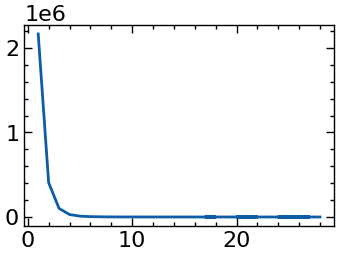

In [43]:
tdf = train_df.groupby(['user_id','product_id'])['query_id'].count()
tdf[tdf >= 1].dropna().value_counts().plot()

<AxesSubplot:>

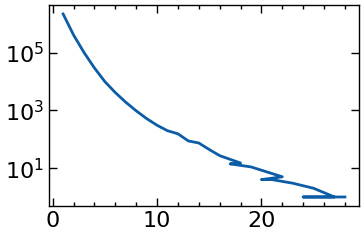

In [44]:
tdf[tdf >= 1].dropna().value_counts().plot()

<AxesSubplot:>

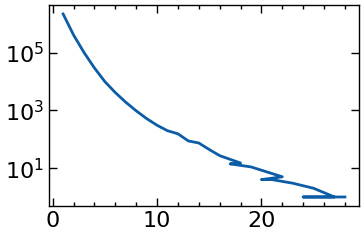

In [49]:
tdf[tdf >= 1].dropna().value_counts().plot(logy=True)

<AxesSubplot:>

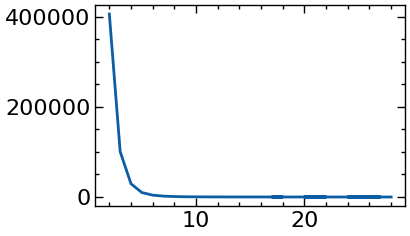

In [50]:
tdf[tdf >= 2].dropna().value_counts().plot()

<AxesSubplot:>

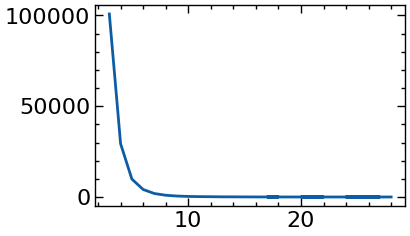

In [51]:
tdf[tdf >= 3].dropna().value_counts().plot()

<AxesSubplot:>

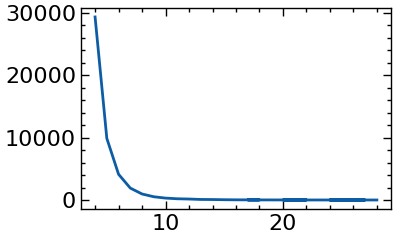

In [52]:
tdf[tdf >= 4].dropna().value_counts().plot()

In [53]:
tdf = train_df.groupby(['user_id','product_id'])['is_click'].sum()
tdf.value_counts()

0     2138153
1      562930
2       15854
3        1705
4         338
5         107
6          39
7          16
8           8
10          7
9           3
11          1
Name: is_click, dtype: int64

In [24]:
tdf = train_df.groupby(['user_id'])['query_id'].nunique()
tdf.value_counts().sort_index()

1      103095
2       42970
3       21847
4       12408
5        7498
        ...  
343         1
367         1
448         1
507         1
738         1
Name: query_id, Length: 139, dtype: int64

In [20]:
tdf = validation_df.groupby(['user_id'])['query_id'].nunique()
tdf.value_counts()

1    114532
Name: query_id, dtype: int64

In [55]:
train_df.describe()

,product_price,week,week_day,is_click
count,3.507990e+06,3.507990e+06,3.507990e+06,3.507990e+06
mean,1.691022e-03,5.065429e+00,2.941093e+00,1.716533e-01
std,1.245486e-02,1.901958e+00,1.988291e+00,3.770789e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,3.295741e-04,3.000000e+00,1.000000e+00,0.000000e+00
50%,6.202834e-04,5.000000e+00,3.000000e+00,0.000000e+00
75%,1.166586e-03,7.000000e+00,5.000000e+00,0.000000e+00
max,1.000000e+00,8.000000e+00,6.000000e+00,1.000000e+00


In [6]:
train_df['query_id']

0          92d4dd491a874a2cf92c8d311a44a42b597c64a5ede23d...
1          541a93bd95c3f4127a53e6b0d4b41db55ad9cb9e19d34a...
2          263ea1e38126fe0c7bfbff24a33b1a09f4dac4f8cd4bb4...
3          3727580d84ce2fbe42ff8bc6f732331f65ea659864a04c...
4          1fcf5d263785455311cecf2f864eaa2eeca4da488383d9...
                                 ...                        
3507985    85b2731ba5e9faa2fd56e8e6420f47f96b7ad7a57f319c...
3507986    32e7c5c935fbdd347c1664cfe4034170d8abcc10aa465d...
3507987    e5d097de586cab95a701344545a64be4d0a67ea7c38e24...
3507988    e663ea061c140a320b5d343bb13a35daa63ecafbc7a7b8...
3507989    eb840d67711365bb48395240aaac491aadfd241659d50b...
Name: query_id, Length: 3507990, dtype: object

In [56]:
train_df['query_id'].nunique()*6 == train_df['query_id'].shape[0]

True

In [57]:
train_df['uid']= train_df.groupby(['user_id']).cumcount()

In [58]:
train_df

,query_id,user_id,session_id,product_id,page_type,previous_page_type,device_category,device_platform,user_tier,user_country,context_type,context_value,product_price,week,week_day,is_click,uid
0,92d4dd491a874a2cf92c8d311a44a42b597c64a5ede23d...,e5e4c71b1b9456dafece1338762d4ee3db698cf32c384c...,2740b0d77b4e6fafd75321f7d0794210afa8bd650955e7...,bf056e3841dd3a358c6aacb1f9e74e4c7c4adc62e33b45...,596618814963e496d74434df8b8fe3306892f2e4ce6aaa...,c9f34437ce0e536fefd11a34b9a411b541d2dabfec872a...,d6538f13ace825448d0af4fa5e58d2d08fa2d0850e5e14...,d6538f13ace825448d0af4fa5e58d2d08fa2d0850e5e14...,d74a5cebc23c56af60a5768c22d44b52f598629d4011fa...,fec032cb05435471f2305006f4a1ba994c9d2f4bcad8ef...,designer_id,e5315dbea15a033bc6974a0bccf5fae4a017648bcd92ab...,0.000263,7,6,0,0
1,541a93bd95c3f4127a53e6b0d4b41db55ad9cb9e19d34a...,fca847f7eb5a5a21991421354b0f26afb4a517e540541f...,d5feab37634fd140e85b8f98dcb909a8779b4f0417c73a...,c6513ec49c8e04c265c907933799ff76f24c075c6308c4...,06a7f8e972f61aeb0e06335699518079a444e4450ff766...,d74a5cebc23c56af60a5768c22d44b52f598629d4011fa...,d6538f13ace825448d0af4fa5e58d2d08fa2d0850e5e14...,d6538f13ace825448d0af4fa5e58d2d08fa2d0850e5e14...,d179859aac8f7c1f88e1ee29b6655596873318c55127d3...,8c82855f15d05cd74fa59956434df17522fc68e4ce3900...,product_id,61205c20046f2688cb7ed03cad29d5a5dbdc360ff48290...,0.012966,6,5,0,0
2,263ea1e38126fe0c7bfbff24a33b1a09f4dac4f8cd4bb4...,90ea15d8d96a9d3e7ab463d990e5f4565cac9477498d37...,18ae37a1a05faa7fd54818794a1a8e44073e00a56fa05f...,b4d5e28da10318aa7776b364528dc92f83ba45326018b5...,06a7f8e972f61aeb0e06335699518079a444e4450ff766...,c9f34437ce0e536fefd11a34b9a411b541d2dabfec872a...,bf2241c08d92d32a6782b4041a2c11ca58882ca88454b3...,702e4598004745673c0f6b50387bef9e1d5f503bd8c1c0...,d74a5cebc23c56af60a5768c22d44b52f598629d4011fa...,c94ddcb9053eae77ab9abec807ef2b0bb4efac14404d17...,product_id,3a519c0b692e93feff8810bbbd4654eb297379271a8a04...,0.002734,6,5,0,0
3,3727580d84ce2fbe42ff8bc6f732331f65ea659864a04c...,8f88d89f2a71e2adf42f885fa6adedd09bf039843b535c...,10667a5a6047aa173d13997cdcd996cbdaf9b0149f9655...,5a36f600d3c01763c28e2dafc53119fba7bcc6a867ab8f...,06a7f8e972f61aeb0e06335699518079a444e4450ff766...,c9f34437ce0e536fefd11a34b9a411b541d2dabfec872a...,d6538f13ace825448d0af4fa5e58d2d08fa2d0850e5e14...,d6538f13ace825448d0af4fa5e58d2d08fa2d0850e5e14...,d74a5cebc23c56af60a5768c22d44b52f598629d4011fa...,8c82855f15d05cd74fa59956434df17522fc68e4ce3900...,product_id,c739fd56b5999e40d7391008230454adb1e371d30c6973...,0.000070,5,5,0,0
4,1fcf5d263785455311cecf2f864eaa2eeca4da488383d9...,6b21688d90dfd9677fa7979dfc6da5b963c0e1e3d68a38...,8b39f00bfc9d45ed6f64dd39a72548936a157f9f03e7f4...,314d20e9e9ec3e97d1867c8bf8c6feb0c23d918021e175...,06a7f8e972f61aeb0e06335699518079a444e4450ff766...,c9f34437ce0e536fefd11a34b9a411b541d2dabfec872a...,bf2241c08d92d32a6782b4041a2c11ca58882ca88454b3...,702e4598004745673c0f6b50387bef9e1d5f503bd8c1c0...,d74a5cebc23c56af60a5768c22d44b52f598629d4011fa...,ea2f413bd8fda0b91a814a68aa520044b204796991a343...,product_id,ebe7ea6e59e7fbd292af5284048b53d356aac5b57d7557...,0.000090,3,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3507985,85b2731ba5e9faa2fd56e8e6420f47f96b7ad7a57f319c...,02c139e1b1044a899f466811edc8b6fe4662a72ee27472...,f3a22c5a8f9a66ee51407caac11a293d15cc07a820ff09...,f1e78af0c2b8caa454df2b997cb9cdb7a043ee5f66d980...,06a7f8e972f61aeb0e06335699518079a444e4450ff766...,68445f7826a01ec32780e1dea743e15d42dbf85bdceedc...,d6538f13ace825448d0af4fa5e58d2d08fa2d0850e5e14...,d6538f13ace825448d0af4fa5e58d2d08fa2d0850e5e14...,be303dabea69281312bc30730bcef52abb9d27331f2809...,931b19eb9eb42f7d672a924ad811ceb9ba5bea5651db82...,product_id,ed468e0d7c27392ff1564e5d49449f7e117cf6b103771b...,0.000493,6,2,0,11
3507986,32e7c5c935fbdd347c1664cfe4034170d8abcc10aa465d...,6dda9636ee6ca1975d1114b95a589e6870425720990368...,23a8e44a35bda05602892638e357a4d5af33408d0ad00a...,5eb06118e849aff141d3660493bc09d4e86352ebf1e39a...,06a7f8e972f61aeb0e06335699518079a444e445

In [83]:
train_num_users = len(train_df['user_id'].unique())
train_num_items = len(train_df['product_id'].unique())
train_num_observations = len(train_df)

In [84]:
train_num_users, train_num_items, train_num_observations

(208393, 408263, 3507990)

In [85]:
validation_num_users = len(validation_df['user_id'].unique())
validation_num_items = len(validation_df['product_id'].unique())
validation_num_observations = len(validation_df)

In [86]:
validation_num_users, validation_num_items, validation_num_observations

(114532, 218525, 687192)

In [74]:
print('intersection of users-items in train-validation set')
len(train_df.set_index(['user_id','product_id']).index.intersection(validation_df.set_index(['user_id','product_id']).index))

intersection of users-items in train-validation set


250799

In [73]:
print('intersection of users in train-validation set')
len(train_df.set_index(['user_id']).index.intersection(validation_df.set_index(['user_id']).index))

intersection of users in train-validation set


103890

In [90]:
tdf = validation_df.groupby(['user_id','product_id'])['query_id'].count()
tdf.dropna().value_counts()

1    687192
Name: query_id, dtype: int64

In [93]:
vdf = validation_df.groupby(['user_id'])['query_id'].count()
vdf.dropna().value_counts()

6    114532
Name: query_id, dtype: int64

In [112]:
tdf = train_df.groupby(['user_id'])['query_id'].nunique()

Text(0, 0.5, '#users')

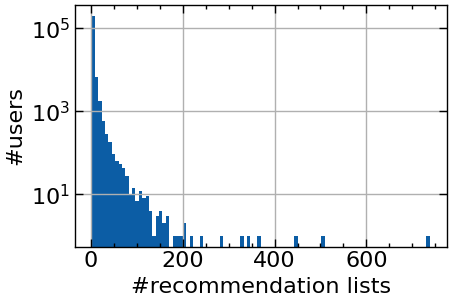

In [115]:
fig, ax = plt.subplots()
tdf.hist(bins=100)
ax.set_yscale('log')
ax.set_xlabel('#recommendation lists')
ax.set_ylabel('#users')

In [132]:
tdf=train_df.groupby(['product_id'])['query_id'].count().sort_values(ascending=False).reset_index(drop=True)

<AxesSubplot:>

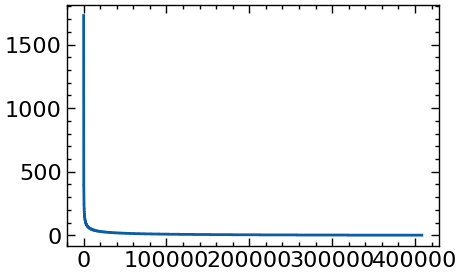

In [133]:
tdf.plot()

<AxesSubplot:>

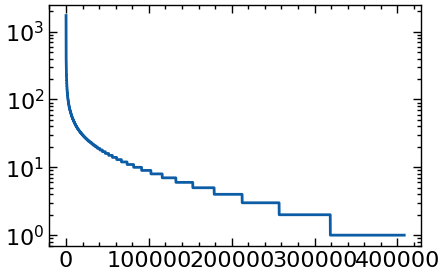

In [134]:
tdf.plot(logy=True)

In [62]:

def df_integer_id(df,field):
    #df = df.sort_values(field)
    df = df.groupby(field).count()
    df /= df
    df = df.cumsum()
    return df
df_integer_id(train_df,'user_id')

,query_id,session_id,product_id,page_type,previous_page_type,device_category,device_platform,user_tier,user_country,context_type,context_value,product_price,week,week_day,is_click,uid
user_id,,,,,,,,,,,,,,,,
00001039003fd7fbc902f30fb6d78eaa5176f7291cba9aabd10659c6864e2903,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
000032873c3c3fbab4ebc172399290d56247cbc1ef692c242429f54cb8fd4e10,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
0000511b406188f830c5fbf3b3be20b6883ec872e418a12d9e16888962c1fe13,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
00008e290e495a3980448ae65d3de9d8857ab945949cc010cf17617e870340ae,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
0000b8fe24d60b23e0c70707e21eba6e3d28b45a85060b46e177306e5afd54fa,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffecbdecc28b6bcff003122e7a84a7650758f394c4f736fdd29e149eabd04f7,208389.0,208389.0,208389.0,208389.0,208389.0,208389.0,208389.0,208389.0,208389.0,201619.0,208389.0,208389.0,208389.0,208389.0,208389.0,208389.0
fffeda4a444c392131ad3054e88d9beac7126bd1c84fb8134fcefc3fc2710801,208390.0,208390.0,208390.0,208390.0,208390.0,208390.0,208390.0,208390.0,208390.0,201620.0,208390.0,208390.0,208390.0,208390.0,208390.0,208390.0
ffff254066fe44152778a20900e727809e132c07b534bfb0de94229671181068,208391.0,208391.0,208391.0,208391.0,208391.0,208391.0,208391.0,208391.0,208391.0,201621.0,208391.0,208391.0,208391.0,208391.0,208391.0,208391.0


In [63]:
train_df

,query_id,user_id,session_id,product_id,page_type,previous_page_type,device_category,device_platform,user_tier,user_country,context_type,context_value,product_price,week,week_day,is_click,uid
0,92d4dd491a874a2cf92c8d311a44a42b597c64a5ede23d...,e5e4c71b1b9456dafece1338762d4ee3db698cf32c384c...,2740b0d77b4e6fafd75321f7d0794210afa8bd650955e7...,bf056e3841dd3a358c6aacb1f9e74e4c7c4adc62e33b45...,596618814963e496d74434df8b8fe3306892f2e4ce6aaa...,c9f34437ce0e536fefd11a34b9a411b541d2dabfec872a...,d6538f13ace825448d0af4fa5e58d2d08fa2d0850e5e14...,d6538f13ace825448d0af4fa5e58d2d08fa2d0850e5e14...,d74a5cebc23c56af60a5768c22d44b52f598629d4011fa...,fec032cb05435471f2305006f4a1ba994c9d2f4bcad8ef...,designer_id,e5315dbea15a033bc6974a0bccf5fae4a017648bcd92ab...,0.000263,7,6,0,0
1,541a93bd95c3f4127a53e6b0d4b41db55ad9cb9e19d34a...,fca847f7eb5a5a21991421354b0f26afb4a517e540541f...,d5feab37634fd140e85b8f98dcb909a8779b4f0417c73a...,c6513ec49c8e04c265c907933799ff76f24c075c6308c4...,06a7f8e972f61aeb0e06335699518079a444e4450ff766...,d74a5cebc23c56af60a5768c22d44b52f598629d4011fa...,d6538f13ace825448d0af4fa5e58d2d08fa2d0850e5e14...,d6538f13ace825448d0af4fa5e58d2d08fa2d0850e5e14...,d179859aac8f7c1f88e1ee29b6655596873318c55127d3...,8c82855f15d05cd74fa59956434df17522fc68e4ce3900...,product_id,61205c20046f2688cb7ed03cad29d5a5dbdc360ff48290...,0.012966,6,5,0,0
2,263ea1e38126fe0c7bfbff24a33b1a09f4dac4f8cd4bb4...,90ea15d8d96a9d3e7ab463d990e5f4565cac9477498d37...,18ae37a1a05faa7fd54818794a1a8e44073e00a56fa05f...,b4d5e28da10318aa7776b364528dc92f83ba45326018b5...,06a7f8e972f61aeb0e06335699518079a444e4450ff766...,c9f34437ce0e536fefd11a34b9a411b541d2dabfec872a...,bf2241c08d92d32a6782b4041a2c11ca58882ca88454b3...,702e4598004745673c0f6b50387bef9e1d5f503bd8c1c0...,d74a5cebc23c56af60a5768c22d44b52f598629d4011fa...,c94ddcb9053eae77ab9abec807ef2b0bb4efac14404d17...,product_id,3a519c0b692e93feff8810bbbd4654eb297379271a8a04...,0.002734,6,5,0,0
3,3727580d84ce2fbe42ff8bc6f732331f65ea659864a04c...,8f88d89f2a71e2adf42f885fa6adedd09bf039843b535c...,10667a5a6047aa173d13997cdcd996cbdaf9b0149f9655...,5a36f600d3c01763c28e2dafc53119fba7bcc6a867ab8f...,06a7f8e972f61aeb0e06335699518079a444e4450ff766...,c9f34437ce0e536fefd11a34b9a411b541d2dabfec872a...,d6538f13ace825448d0af4fa5e58d2d08fa2d0850e5e14...,d6538f13ace825448d0af4fa5e58d2d08fa2d0850e5e14...,d74a5cebc23c56af60a5768c22d44b52f598629d4011fa...,8c82855f15d05cd74fa59956434df17522fc68e4ce3900...,product_id,c739fd56b5999e40d7391008230454adb1e371d30c6973...,0.000070,5,5,0,0
4,1fcf5d263785455311cecf2f864eaa2eeca4da488383d9...,6b21688d90dfd9677fa7979dfc6da5b963c0e1e3d68a38...,8b39f00bfc9d45ed6f64dd39a72548936a157f9f03e7f4...,314d20e9e9ec3e97d1867c8bf8c6feb0c23d918021e175...,06a7f8e972f61aeb0e06335699518079a444e4450ff766...,c9f34437ce0e536fefd11a34b9a411b541d2dabfec872a...,bf2241c08d92d32a6782b4041a2c11ca58882ca88454b3...,702e4598004745673c0f6b50387bef9e1d5f503bd8c1c0...,d74a5cebc23c56af60a5768c22d44b52f598629d4011fa...,ea2f413bd8fda0b91a814a68aa520044b204796991a343...,product_id,ebe7ea6e59e7fbd292af5284048b53d356aac5b57d7557...,0.000090,3,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3507985,85b2731ba5e9faa2fd56e8e6420f47f96b7ad7a57f319c...,02c139e1b1044a899f466811edc8b6fe4662a72ee27472...,f3a22c5a8f9a66ee51407caac11a293d15cc07a820ff09...,f1e78af0c2b8caa454df2b997cb9cdb7a043ee5f66d980...,06a7f8e972f61aeb0e06335699518079a444e4450ff766...,68445f7826a01ec32780e1dea743e15d42dbf85bdceedc...,d6538f13ace825448d0af4fa5e58d2d08fa2d0850e5e14...,d6538f13ace825448d0af4fa5e58d2d08fa2d0850e5e14...,be303dabea69281312bc30730bcef52abb9d27331f2809...,931b19eb9eb42f7d672a924ad811ceb9ba5bea5651db82...,product_id,ed468e0d7c27392ff1564e5d49449f7e117cf6b103771b...,0.000493,6,2,0,11
3507986,32e7c5c935fbdd347c1664cfe4034170d8abcc10aa465d...,6dda9636ee6ca1975d1114b95a589e6870425720990368...,23a8e44a35bda05602892638e357a4d5af33408d0ad00a...,5eb06118e849aff141d3660493bc09d4e86352ebf1e39a...,06a7f8e972f61aeb0e06335699518079a444e445

In [138]:
train_df.groupby(['product_id'])['query_id'].count().sort_values(ascending=False).iloc[:6]

product_id
55e1495c40504b4b15a358f95e2cbede34d011b287c32bcab06bb9c0b2b55c7b    1728
b854610c86034fd48a5f9425daf4b31d0dddc7659e3498307de782a3492f98d2    1559
f3bee158e5cccca0419223f80fda086032cbb4a77babc19fbb6030dc81a1c2c8    1395
ead1ee890172ccecf66eb85c3b081aec3bfd0f46b4644378846b335bb1ef7d9e    1377
0c166227b9e707541a81c20864bea7d85d300360347dac0936df1ff72a2d6b36    1362
6c2259685c9c5897f57b509264e468820381c122cd48f0985c4e98e3f4bebb60    1307
Name: query_id, dtype: int64

In [191]:
def mrr(predicted,ground_truth):
    v = 0
    for i, p in enumerate(predicted):
        if p in ground_truth:
            v += 1/(i+1)
            break
    return v

In [150]:
#most_popular_6 = set(train_df.groupby(['product_id'])['query_id'].count().sort_values(ascending=False).iloc[:6].index)

In [ ]:
#def Recommender:
#    def __init__():

In [9]:
# mrrs = []
items_popularity = train_df.groupby(['product_id'])['query_id'].count().sort_values(ascending=False)
result = pd.DataFrame(columns=['query_id','product_id','rank'])
tmp_results = []
def product_score(product,rule):
    if product in rule:
        return rule[product]
    else:
        return -99999
tmp_df = validation_df.groupby(['user_id','query_id'])['product_id'].agg(lambda x: set(x))
for (user_id, query_id), products in tqdm(tmp_df.iteritems(),total=len(tmp_df)):
#     print(user_id,query_id,products_consumed)
#     mrrs.append(mrr(most_popular_6,products))
#     if query_id == 'f1e40f56505d267b2e33ef69d3691e2d2bf9eb42f900200567d05c98aaea7a8d':
    items_values= {p: product_score(p,items_popularity) for p in products}
    items_values = {k: v for k, v in sorted(items_values.items(), key=lambda item: item[1])}
    i=0
    for p_rec, val in items_values.items():
#         print(pd.DataFrame([query_id,p_rec,i+1],columns=result.columns,index=None))
        tmp_results.append([query_id,p_rec,i+1])
        
        i+=1
result = result.append(pd.DataFrame(tmp_results,columns=result.columns),ignore_index=True)
# np.mean(mrrs)


100%|██████████| 114532/114532 [00:07<00:00, 14506.87it/s]


In [14]:
result.to_csv('data_phase1/submission_popular.csv',index=False)

In [195]:
train_df[train_df['user_id'].str.contains('1d2eba18ac3d34c1a89061b2845c4ac119492ddab93cb2')]

,query_id,user_id,session_id,product_id,page_type,previous_page_type,device_category,device_platform,user_tier,user_country,context_type,context_value,product_price,week,week_day,is_click,uid
460657,dd556f9cf60101a568a3a1eb866e47745597d1f4094079...,1d2eba18ac3d34c1a89061b2845c4ac119492ddab93cb2...,58cb7a0884a9e4593ff20267114be2e8767b3cb2f81499...,0a2f49faafab1f69dcc4e37564b6cdf836483d04f43546...,06a7f8e972f61aeb0e06335699518079a444e4450ff766...,d74a5cebc23c56af60a5768c22d44b52f598629d4011fa...,bf2241c08d92d32a6782b4041a2c11ca58882ca88454b3...,702e4598004745673c0f6b50387bef9e1d5f503bd8c1c0...,d74a5cebc23c56af60a5768c22d44b52f598629d4011fa...,10f1091f611fd153b752c1260b7e11d7e852ddaa30749a...,product_id,3dec684e3cefb2bf479c82661ad51a94ca704720bbeffa...,0.001177,7,0,0,0
512168,dd556f9cf60101a568a3a1eb866e47745597d1f4094079...,1d2eba18ac3d34c1a89061b2845c4ac119492ddab93cb2...,58cb7a0884a9e4593ff20267114be2e8767b3cb2f81499...,75020d1cedbebf958917002f961e8b4caa8bf124ddc4be...,06a7f8e972f61aeb0e06335699518079a444e4450ff766...,d74a5cebc23c56af60a5768c22d44b52f598629d4011fa...,bf2241c08d92d32a6782b4041a2c11ca58882ca88454b3...,702e4598004745673c0f6b50387bef9e1d5f503bd8c1c0...,d74a5cebc23c56af60a5768c22d44b52f598629d4011fa...,10f1091f611fd153b752c1260b7e11d7e852ddaa30749a...,product_id,3dec684e3cefb2bf479c82661ad51a94ca704720bbeffa...,0.000375,7,0,0,1
694516,b098b56f4c0b0e92d20fae68453039b7809fc320a66f02...,1d2eba18ac3d34c1a89061b2845c4ac119492ddab93cb2...,240cd94c59dde97ac8e52af64d54b34e1f5663beb00e67...,f805cacab83215bf2fbd9acf82d2d3277c33b4cfbaa25c...,06a7f8e972f61aeb0e06335699518079a444e4450ff766...,3911eca1829c01620ad267679052b0b485f4b31f4772aa...,bf2241c08d92d32a6782b4041a2c11ca58882ca88454b3...,702e4598004745673c0f6b50387bef9e1d5f503bd8c1c0...,d74a5cebc23c56af60a5768c22d44b52f598629d4011fa...,10f1091f611fd153b752c1260b7e11d7e852ddaa30749a...,product_id,cb913ac6dc8056e216571c7a95aafaebea1b57a83db732...,0.000378,7,1,0,2
1367713,dd556f9cf60101a568a3a1eb866e47745597d1f4094079...,1d2eba18ac3d34c1a89061b2845c4ac119492ddab93cb2...,58cb7a0884a9e4593ff20267114be2e8767b3cb2f81499...,bc638db93ee4dc6e809173a36de6056dde19de4ceadc34...,06a7f8e972f61aeb0e06335699518079a444e4450ff766...,d74a5cebc23c56af60a5768c22d44b52f598629d4011fa...,bf2241c08d92d32a6782b4041a2c11ca58882ca88454b3...,702e4598004745673c0f6b50387bef9e1d5f503bd8c1c0...,d74a5cebc23c56af60a5768c22d44b52f598629d4011fa...,10f1091f611fd153b752c1260b7e11d7e852ddaa30749a...,product_id,3dec684e3cefb2bf479c82661ad51a94ca704720bbeffa...,0.000132,7,0,1,3
1874367,dd556f9cf60101a568a3a1eb866e47745597d1f4094079...,1d2eba18ac3d34c1a89061b2845c4ac119492ddab93cb2...,58cb7a0884a9e4593ff20267114be2e8767b3cb2f81499...,5c4c564718b3f4a1d5b56772c53b3b2e9e00fe65eeee2e...,06a7f8e972f61aeb0e06335699518079a444e4450ff766...,d74a5cebc23c56af60a5768c22d44b52f598629d4011fa...,bf2241c08d92d32a6782b4041a2c11ca58882ca88454b3...,702e4598004745673c0f6b50387bef9e1d5f503bd8c1c0...,d74a5cebc23c56af60a5768c22d44b52f598629d4011fa...,10f1091f611fd153b752c1260b7e11d7e852ddaa30749a...,product_id,3dec684e3cefb2bf479c82661ad51a94ca704720bbeffa...,0.000076,7,0,0,4
1988678,b098b56f4c0b0e92d20fae68453039b7809fc320a66f02...,1d2eba18ac3d34c1a89061b2845c4ac119492ddab93cb2...,240cd94c59dde97ac8e52af64d54b34e1f5663beb00e67...,8ad7e8c9cdf42f7f1c8698ff03bec44f2eb7bf854962c8...,06a7f8e972f61aeb0e06335699518079a444e4450ff766...,3911eca1829c01620ad267679052b0b485f4b31f4772aa...,bf2241c08d92d32a6782b4041a2c11ca58882ca88454b3...,702e4598004745673c0f6b50387bef9e1d5f503bd8c1c0...,d74a5cebc23c56af60a5768c22d44b52f598629d4011fa...,10f1091f611fd153b752c1260b7e11d7e852ddaa30749a...,product_id,cb913ac6dc8056e216571c7a95aafaebea1b57a83db732...,0.000361,7,1,0,5
2034262,b098b56f4c0b0e92d20fae68453039b7809fc320a66f02...,1d2eba18ac3d34c1a89061b2845c4ac119492ddab93cb2...,240cd94c59dde97ac8e52af64d54b34e1f5663beb00e67...,1248f746f7e57f33ad8e85537983aceadab420d336ea2f...,06a7f8e972f61aeb0e06335699518079a444e4450ff766...,3911eca1829c01620ad267679052b0b485f4b

In [177]:
validation_df[validation_df['query_id'] == 'f1e40f56505d267b2e33ef69d3691e2d2bf9eb42f900200567d05c98aaea7a8d']

,query_id,user_id,session_id,product_id,page_type,previous_page_type,device_category,device_platform,user_tier,user_country,context_type,context_value,product_price,week,week_day
64103,f1e40f56505d267b2e33ef69d3691e2d2bf9eb42f90020...,1d2eba18ac3d34c1a89061b2845c4ac119492ddab93cb2...,a855ef887de6f098b12caf0920a7155d98d9ea51ac42cc...,9ea36e45afa40014ac6b1b511532b2bd58675fe5da9a89...,06a7f8e972f61aeb0e06335699518079a444e4450ff766...,d74a5cebc23c56af60a5768c22d44b52f598629d4011fa...,bf2241c08d92d32a6782b4041a2c11ca58882ca88454b3...,702e4598004745673c0f6b50387bef9e1d5f503bd8c1c0...,d74a5cebc23c56af60a5768c22d44b52f598629d4011fa...,6826951de7bea49f73814ecb8f4d9bd1fbd2aaf48e4cc8...,product_id,d70e0bc1e9e94b7d0bb5a8ca67ad3c3418b07915334a4f...,0.000245,7,5
224884,f1e40f56505d267b2e33ef69d3691e2d2bf9eb42f90020...,1d2eba18ac3d34c1a89061b2845c4ac119492ddab93cb2...,a855ef887de6f098b12caf0920a7155d98d9ea51ac42cc...,ad7146a35a59dec04c66343e407be32e7b02a5d757818d...,06a7f8e972f61aeb0e06335699518079a444e4450ff766...,d74a5cebc23c56af60a5768c22d44b52f598629d4011fa...,bf2241c08d92d32a6782b4041a2c11ca58882ca88454b3...,702e4598004745673c0f6b50387bef9e1d5f503bd8c1c0...,d74a5cebc23c56af60a5768c22d44b52f598629d4011fa...,6826951de7bea49f73814ecb8f4d9bd1fbd2aaf48e4cc8...,product_id,d70e0bc1e9e94b7d0bb5a8ca67ad3c3418b07915334a4f...,0.000418,7,5
462719,f1e40f56505d267b2e33ef69d3691e2d2bf9eb42f90020...,1d2eba18ac3d34c1a89061b2845c4ac119492ddab93cb2...,a855ef887de6f098b12caf0920a7155d98d9ea51ac42cc...,4f27adff55ed2d91eef9f2a85ff02cc1ae7e4e7c85f746...,06a7f8e972f61aeb0e06335699518079a444e4450ff766...,d74a5cebc23c56af60a5768c22d44b52f598629d4011fa...,bf2241c08d92d32a6782b4041a2c11ca58882ca88454b3...,702e4598004745673c0f6b50387bef9e1d5f503bd8c1c0...,d74a5cebc23c56af60a5768c22d44b52f598629d4011fa...,6826951de7bea49f73814ecb8f4d9bd1fbd2aaf48e4cc8...,product_id,d70e0bc1e9e94b7d0bb5a8ca67ad3c3418b07915334a4f...,0.000439,7,5
476020,f1e40f56505d267b2e33ef69d3691e2d2bf9eb42f90020...,1d2eba18ac3d34c1a89061b2845c4ac119492ddab93cb2...,a855ef887de6f098b12caf0920a7155d98d9ea51ac42cc...,310c5a91614cbcb9bf6fff410ccfcf2944bae6983c95b5...,06a7f8e972f61aeb0e06335699518079a444e4450ff766...,d74a5cebc23c56af60a5768c22d44b52f598629d4011fa...,bf2241c08d92d32a6782b4041a2c11ca58882ca88454b3...,702e4598004745673c0f6b50387bef9e1d5f503bd8c1c0...,d74a5cebc23c56af60a5768c22d44b52f598629d4011fa...,6826951de7bea49f73814ecb8f4d9bd1fbd2aaf48e4cc8...,product_id,d70e0bc1e9e94b7d0bb5a8ca67ad3c3418b07915334a4f...,0.000293,7,5
519519,f1e40f56505d267b2e33ef69d3691e2d2bf9eb42f90020...,1d2eba18ac3d34c1a89061b2845c4ac119492ddab93cb2...,a855ef887de6f098b12caf0920a7155d98d9ea51ac42cc...,863fe5fa63f1d492533abe5e856eb6ddb7f415618de3b5...,06a7f8e972f61aeb0e06335699518079a444e4450ff766...,d74a5cebc23c56af60a5768c22d44b52f598629d4011fa...,bf2241c08d92d32a6782b4041a2c11ca58882ca88454b3...,702e4598004745673c0f6b50387bef9e1d5f503bd8c1c0...,d74a5cebc23c56af60a5768c22d44b52f598629d4011fa...,6826951de7bea49f73814ecb8f4d9bd1fbd2aaf48e4cc8...,product_id,d70e0bc1e9e94b7d0bb5a8ca67ad3c3418b07915334a4f...,0.000248,7,5
619809,f1e40f56505d267b2e33ef69d3691e2d2bf9eb42f90020...,1d2eba18ac3d34c1a89061b2845c4ac119492ddab93cb2...,a855ef887de6f098b12caf0920a7155d98d9ea51ac42cc...,fae52af9dd12ed8acd02c85d64f6c1a20583267a7107e4...,06a7f8e972f61aeb0e06335699518079a444e4450ff766...,d74a5cebc23c56af60a5768c22d44b52f598629d4011fa...,bf2241c08d92d32a6782b4041a2c11ca58882ca88454b3...,702e4598004745673c0f6b50387bef9e1d5f503bd8c1c0...,d74a5cebc23c56af60a5768c22d44b52f598629d4011fa...,6826951de7bea49f73814ecb8f4d9bd1fbd2aaf48e4cc8...,product_id,d70e0bc1e9e94b7d0bb5a8ca67ad3c3418b07915334a4f...,0.000245,7,5


In [11]:
!ls data_phase1; wc -l data_phase1/submission_example.csv;head -n10 data_phase1/submission_example.csv

attributes.parquet	TermsAndConditions.txt	validation.parquet
submission_example.csv	train.parquet
687193 data_phase1/submission_example.csv
query_id,product_id,rank
f1e5369800a196404a74181a227f7784470e6e6aef83400a963fc21f22ebf4d1,2e6550c8056f95b4a60d64ec986dc63892f00672ca6be611579382694bf23abf,6
f1e40f56505d267b2e33ef69d3691e2d2bf9eb42f900200567d05c98aaea7a8d,310c5a91614cbcb9bf6fff410ccfcf2944bae6983c95b59ffba96a7a8ab1e436,1
f1e40f56505d267b2e33ef69d3691e2d2bf9eb42f900200567d05c98aaea7a8d,fae52af9dd12ed8acd02c85d64f6c1a20583267a7107e43e2e8b8dc1245de26b,2
f1e40f56505d267b2e33ef69d3691e2d2bf9eb42f900200567d05c98aaea7a8d,9ea36e45afa40014ac6b1b511532b2bd58675fe5da9a89712a1c289560c4aaaa,3
f1e40f56505d267b2e33ef69d3691e2d2bf9eb42f900200567d05c98aaea7a8d,863fe5fa63f1d492533abe5e856eb6ddb7f415618de3b58c007e23874c3469f3,4
f1e40f56505d267b2e33ef69d3691e2d2bf9eb42f900200567d05c98aaea7a8d,4f27adff55ed2d91eef9f2a85ff02cc1ae7e4e7c85f74664ddad5dd865c5a135,5
f1e40f56505d267b2e33ef69d3691e2d2bf9eb42f90

In [15]:
!head 'data_phase1/submission_popular.csv'

query_id,product_id,rank
4ee6202c503da7edd23524e72333ebf58c7fefd21462fd17c441c299c52812f6,8727783c30c14163b1dd234b83448b48b279acc6a2737e7687dbe3b8bb5f03ce,1
4ee6202c503da7edd23524e72333ebf58c7fefd21462fd17c441c299c52812f6,f15057714e91f3ef236ec6e9ae689a16090c315f70823b52617b28b1270024b4,2
4ee6202c503da7edd23524e72333ebf58c7fefd21462fd17c441c299c52812f6,7597faf176da2c707e851268dc2105308c7ba90de29bc58803eaf33e6c92595e,3
4ee6202c503da7edd23524e72333ebf58c7fefd21462fd17c441c299c52812f6,44a7b3bb43e83abf52cea0b135fc4c3de18c886a82415333e59698291e9695c4,4
4ee6202c503da7edd23524e72333ebf58c7fefd21462fd17c441c299c52812f6,e29ee6030076e910fe251e3ab7c48a1cf45aafe07121558cb53515be69e74238,5
4ee6202c503da7edd23524e72333ebf58c7fefd21462fd17c441c299c52812f6,c223076407ab17073859a9c5992a07a3b2db1173bc5ec1eb6604cc0dec9adcb9,6
3a8ee3a3ba684188ba6edffb8d3a78657c240b15201065812cf2c5aa45852844,471c1656b4e495df728420072f018574426fd4498dc3c93df74c28a1ebf5da97,1
3a8ee3a3ba684188ba6edffb8d3a78657c240b15201065812cf

In [46]:
user_ids = np.unique(np.hstack((train_df.user_id.unique(),validation_df.user_id.unique())))
product_ids = np.unique(np.hstack((train_df.product_id.unique(),validation_df.product_id.unique())))

In [47]:
def integer_map(values):
    d=  dict()
    for i, v in enumerate(values):
        d[v] = i
    return d

In [48]:
user_int_ids = integer_map(user_ids)
product_int_ids = integer_map(product_ids)

In [49]:
# def df_integer_id(df,field):
#     #df = df.sort_values(field)
#     df = df.groupby(field).count()
#     df /= df
#     df = df.cumsum()
#     return df
# user_id_map = train_df['query_id'].to_dict()
# product_id_map = df_integer_id(train_df,'product_id')['query_id'].to_dict()

train_df.user_id = train_df.user_id.map(lambda x: user_int_ids[x])


train_df.product_id = train_df.product_id.map(lambda x: product_int_ids[x])

train_normalized_df = train_df.groupby(['user_id','product_id'])['is_click'].sum().reset_index()

train_input_normalized_df = train_normalized_df[['user_id','product_id','is_click']]

In [55]:
validation_df.user_id = validation_df.user_id.map(lambda x: user_int_ids[x])
validation_df.product_id = validation_df.product_id.map(lambda x: product_int_ids[x])



KeyError: 66021

In [63]:
validation_normalized_df = validation_df[['user_id','product_id']].copy()
validation_normalized_df.loc[:,'tmp_rating']=1

In [51]:
import pandas as pd
from SLIM import SLIM, SLIMatrix

#read training data stored as triplets <user> <item> <rating>
traindata = train_input_normalized_df
#print(traindata)
trainmat = SLIMatrix(traindata)

#set up parameters to learn model, e.g., use Coordinate Descent with L1 and L2
#regularization
params = {'algo':'cd', 'nthreads':8, 'l1r':1.0, 'l2r':1.0}

#learn the model using training data and desired parameters
model = SLIM()
model.train(params, trainmat)

#read test data having candidate items for users
# testdata = pd.read_csv('SLIM/test/AutomotiveTest.ijv', delimiter = ' ', header=None)
# #NOTE: model object is passed as an argument while generating test matrix
# testmat = SLIMatrix(testdata, model)

# #generate top-10 recommendations
# prediction_res = model.predict(testmat, nrcmds=10, outfile = 'output.txt')

# # print(prediction_res)

# #dump the model to files on disk
# model.save_model(modelfname='model.csr', # filename to save the model as a csr matrix
#                  mapfname='map.csr' # filename to save the item map
#                 )

# #load the model from from disk
# model_new = SLIM()
# model_new.load_model(modelfname='model.csr', # filename of the model
#                  mapfname='map.csr' # filename of the item map
#                 )

Learning takes 1351.006 secs.


In [65]:
testdata = validation_normalized_df
#NOTE: model object is passed as an argument while generating test matrix
testmat = SLIMatrix(testdata, model)

17490 of the events fall out of the range of oldmat. Partial entries collected.


In [78]:
prediction_items, prediction_scores = model.predict(testmat, nrcmds=6,returnscores=True)

In [81]:
data =[]
for uid,items in prediction_items.items():
    indexes = np.argsort(prediction_scores[uid])[::-1]
    items = [items[i] for i in indexes]
    for i, item in enumerate(items):
        x = [uid,item,i+1]
        data.append(x)

In [84]:
df = pd.DataFrame(data)
df.columns= ['user_id','product_id','rank']

In [92]:
o
# df['user_id'].unique()
def _map(x):
    if len(x) > 1:
        raise SystemError
    else:
        return x[0]
user_id_to_query_id = validation_df.groupby('user_id')['query_id'].unique().map(_map).to_dict()

In [95]:
tmp = {v: k for k, v in product_int_ids.items()}

In [96]:
df['user_id'] = df['user_id'].map(lambda x : user_id_to_query_id[x])
df['product_id'] = df['product_id'].map(lambda x: tmp[x])

In [98]:
df

,user_id,product_id,rank
0,45dbde6284f13d59b04c5d2a5ab2513c896ba8f7a7dde0...,b0a94db2a6628a986b9205a4d087741c94bd41f8da1af8...,1
1,45dbde6284f13d59b04c5d2a5ab2513c896ba8f7a7dde0...,efd89ee939f6bcaec656b39a541d3683337fc7d3ea64cd...,2
2,45dbde6284f13d59b04c5d2a5ab2513c896ba8f7a7dde0...,666c953f3d4edde3953c93ca9bb8e4b17cd4e0400ac4f4...,3
3,45dbde6284f13d59b04c5d2a5ab2513c896ba8f7a7dde0...,ad8bffc884b65496be480e8d91188e7c4b9934a6fbd9f3...,4
4,45dbde6284f13d59b04c5d2a5ab2513c896ba8f7a7dde0...,974b8c60e903562357860aa25b31a8e18ae4844f775d07...,5
...,...,...,...
687187,aff7287c2a82266bd742b06b2dbdfe3cf30e764d169cc1...,56e2f5b744d96babbaf70216b8efea9412894f700e5f72...,2
687188,aff7287c2a82266bd742b06b2dbdfe3cf30e764d169cc1...,ccb0e3bc77daaf0cfbe0e2f552d586e40f5bd1b9a397a2...,3
687189,aff7287c2a82266bd742b06b2dbdfe3cf30e764d169cc1...,da8dd91c00ee3da8bb81393c72238d7f5ea6900ca4c3a1...,4
687190,aff7287c2a82266bd742b06b2dbdfe3cf30e764d169cc1...,78118f1588d96e5d2ab5e38a0d8fb3f2024d193a185485...,5


In [99]:
validation_df

,query_id,user_id,session_id,product_id,page_type,previous_page_type,device_category,device_platform,user_tier,user_country,context_type,context_value,product_price,week,week_day
0,45dbde6284f13d59b04c5d2a5ab2513c896ba8f7a7dde0...,66021,b677570c68f211d9543e96fe46750b66ebdfaa0fb2df0e...,352643,06a7f8e972f61aeb0e06335699518079a444e4450ff766...,c9f34437ce0e536fefd11a34b9a411b541d2dabfec872a...,bf2241c08d92d32a6782b4041a2c11ca58882ca88454b3...,702e4598004745673c0f6b50387bef9e1d5f503bd8c1c0...,d74a5cebc23c56af60a5768c22d44b52f598629d4011fa...,95d5a1bd42a07143383299c081524278a16ef5ce55507c...,product_id,c57422a708323b02f078708e3f5b1e841bb07434bc2adc...,0.000453,8,0
1,6728f8b02604af603d65faa0a2a4e36307f2498c4bdd88...,136610,d1f1a8e13d81de690a968db95dd1960482143f59e6c69b...,334847,06a7f8e972f61aeb0e06335699518079a444e4450ff766...,c9f34437ce0e536fefd11a34b9a411b541d2dabfec872a...,bf2241c08d92d32a6782b4041a2c11ca58882ca88454b3...,702e4598004745673c0f6b50387bef9e1d5f503bd8c1c0...,d74a5cebc23c56af60a5768c22d44b52f598629d4011fa...,c45f0825291fd1a087ef31abbcf9fd0ef10c915edf3041...,product_id,950d471ac609e50a31ecca7c731e9673a32588deb34da4...,0.614475,9,0
2,9d1d782fab18c98c8a8d4dab9cbc0cb3f786b5d5e5fd24...,155953,d572b385d62d7eaaa4872e07ed2771b107d4db0b547212...,165189,06a7f8e972f61aeb0e06335699518079a444e4450ff766...,14fc80e2d6821260d291ff47ce6d8d7534d4cb5aa4ab0d...,d6538f13ace825448d0af4fa5e58d2d08fa2d0850e5e14...,d6538f13ace825448d0af4fa5e58d2d08fa2d0850e5e14...,d74a5cebc23c56af60a5768c22d44b52f598629d4011fa...,58f6d97120664752ed0851301aa78457fe882f67453c58...,product_id,6209104dbe997824b92e3118504acb2ebc863ae3fc27e0...,0.001199,8,3
3,f23d6751b37c235047a64a20ffe732483f487743dc8812...,121261,c5df0c490099d1e4a20173ecbb67880998bc4faf8210a9...,382606,06a7f8e972f61aeb0e06335699518079a444e4450ff766...,c9f34437ce0e536fefd11a34b9a411b541d2dabfec872a...,bf2241c08d92d32a6782b4041a2c11ca58882ca88454b3...,702e4598004745673c0f6b50387bef9e1d5f503bd8c1c0...,d74a5cebc23c56af60a5768c22d44b52f598629d4011fa...,f319f71fd9b14532cf715e601fe3b5c2473b58d4302e88...,product_id,ce3d41b4ed9d444fdd9385ee6b1b1639abb497a13c9385...,0.000418,7,6
4,fe162740ab90f69597b14253e6f0fc6fb87ad8e2146cd8...,28767,1e5f3aaf57b4863421d5019fe834f5e6979876f3d44e43...,278783,06a7f8e972f61aeb0e06335699518079a444e4450ff766...,c9f34437ce0e536fefd11a34b9a411b541d2dabfec872a...,d6538f13ace825448d0af4fa5e58d2d08fa2d0850e5e14...,d6538f13ace825448d0af4fa5e58d2d08fa2d0850e5e14...,d74a5cebc23c56af60a5768c22d44b52f598629d4011fa...,ea2f413bd8fda0b91a814a68aa520044b204796991a343...,product_id,05f1468cf95e2cb32ddeff813e8466e3bc7b798724e4e6...,0.000148,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687187,fee6a172c9c209769780359bdcc41fd9dfa502508fa1cc...,95345,18c27dac82dc8af309e82ccd5374ede61665fcda942d97...,273095,06a7f8e972f61aeb0e06335699518079a444e4450ff766...,d74a5cebc23c56af60a5768c22d44b52f598629d4011fa...,d6538f13ace825448d0af4fa5e58d2d08fa2d0850e5e14...,d6538f13ace825448d0af4fa5e58d2d08fa2d0850e5e14...,d74a5cebc23c56af60a5768c22d44b52f598629d4011fa...,f9e9c2012a8594241e1166e35688c7bdeb2989ad105c38...,product_id,8be14bded79966bb387d10c6f1ceb72f5690fd2d4677d0...,0.000399,4,3
687188,4aff5969cc317a8a612080af85ccd131b49d73ffadfa6b...,120978,2a47fd53613435f2e6e6aba8adab3c0e4c65f28769e614...,94737,06a7f8e972f61aeb0e06335699518079a444e4450ff766...,d74a5cebc23c56af60a5768c22d44b52f598629d4011fa...,d6538f13ace825448d0af4fa5e58d2d08fa2d0850e5e14...,d6538f13ace825448d0af4fa5e58d2d08fa2d0850e5e14...,be303dabea69281312bc30730bcef52abb9d27331f2809...,10f1091f611fd153b752c1260b7e11d7e852ddaa30749a...,product_id,f8b087df32d769b2b1c78190b45bc335fa7ff668d261cb...,0.000757,7,6
687189,573d9512188407948e306e238bd4dc822f9bbe8623f90d...,77778,ce952a0e277c98e448bae9700e86c624ed0e44ce2a0e48...,130978,06a7f8e972f61aeb0e06335699518079a444e4450ff766...,c9f34437ce0e536fefd11a34b9a411b541d2dabfec872a...,d6538f13ace825448d0af4fa5e58d2d08fa2d0850e5e14...,d6538f13ace825448d0af4fa5e58d2d08fa2d0850e5e14...,d

In [103]:
df.columns = ['query_id','product_id','rank']
df.to_csv('data_phase1/output.csv',index=False)